In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.decomposition import TruncatedSVD

In [268]:
df=pd.read_csv('electronics.csv')

In [3]:
df

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0
...,...,...,...,...,...,...,...,...,...,...
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [5]:
df.describe()

,item_id,user_id,rating,year,split
count,1.292954e+06,1.292954e+06,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.183588e+03,5.605127e+05,4.051482e+00,2.012938e+03,1.747587e-01
std,2.525346e+03,3.342374e+05,1.379732e+00,2.643513e+00,5.506810e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.999000e+03,0.000000e+00
25%,2.018000e+03,2.697482e+05,4.000000e+00,2.012000e+03,0.000000e+00
50%,3.930000e+03,5.518920e+05,5.000000e+00,2.014000e+03,0.000000e+00
75%,6.289000e+03,8.474858e+05,5.000000e+00,2.015000e+03,0.000000e+00
max,9.559000e+03,1.157632e+06,5.000000e+00,2.018000e+03,2.000000e+00


In [6]:
df.columns

Index(['item_id', 'user_id', 'rating', 'timestamp', 'model_attr', 'category',
       'brand', 'year', 'user_attr', 'split'],
      dtype='object')

In [271]:
col=['item_id', 'user_id', 'rating', 'timestamp', 'model_attr', 'category',
       'brand', 'year', 'user_attr', 'split']

for i in col:
    print(i)
    print(sum(df[i].isna())*100 / 1292954)

item_id
0.0
user_id
0.0
rating
0.0
timestamp
0.0
model_attr
0.0
category
0.0
brand
74.39042688293628
year
0.0
user_attr
86.53285422373882
split
0.0


In [269]:
for i in col:
    print(i)
    print(df[i].nunique())

item_id
9560
user_id
1157633
rating
5
timestamp
6354
model_attr
3
category
10
brand
50
year
20
user_attr
2
split
3


# Recommendation System 

The recommendation system is designed in 3 parts based on the business context:

Recommendation system part I: Product pupularity based system targetting new customers.

Recommendation system part II: Model-based collaborative filtering system based on customer's purchase history and ratings provided by other users who bought similar items.

Recommendation system part III: When a business is setting up its e-commerce website for the first time without any product rating.



In [280]:
inp= input('Are you a new customer or an existing customer? \n ')

Are you a new customer or an existing customer? 
 New


## Most Popular Products

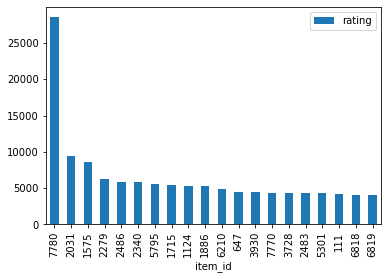

In [278]:
if inp.lower()=='new':
    popular_products= pd.DataFrame(df.groupby('item_id')['rating'].count())
    popular_product_rating= pd.DataFrame(df.groupby('item_id')['rating'].mean())
    most_popular= popular_products.sort_values('rating', ascending= False)
    most_popular.head(20).plot(kind= 'bar')

Most popular products are chosen on the basis of maximum number of ratings given to it.

## Highest Rated Products

In [281]:
cat1= pd.merge(popular_products, popular_product_rating, on='item_id')
cat1.rename(columns={'rating_x': 'rating_count', 'rating_y':'avg_rating'}, inplace=True)
cat1.sort_values(by='rating_count',ascending=False, inplace=True)


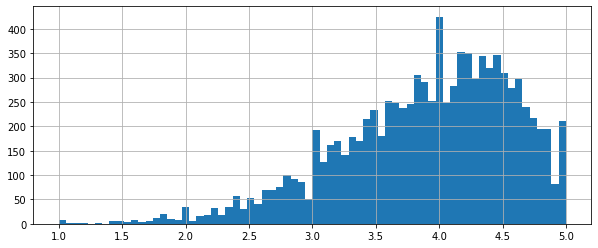

In [282]:
plt.figure(figsize=(10,4))
cat1['avg_rating'].hist(bins=70)

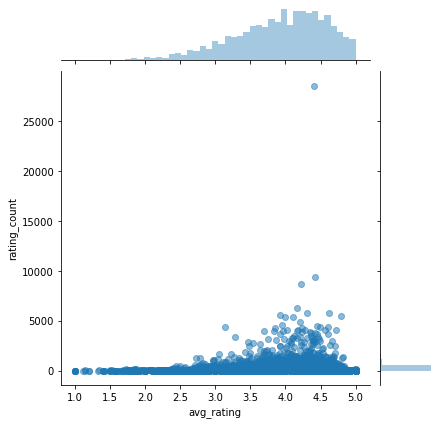

In [283]:
sns.jointplot(x='avg_rating',y='rating_count',data=cat1,alpha=0.5)

-From the above drawn graphs we understand the more the number of rating more is the average rating of the product.

-The ratings tend to be normally distributed beyond a threshold of 150 ratings except a few outliers.

In [284]:
# popular_products.reset_index(level=0, inplace=True)

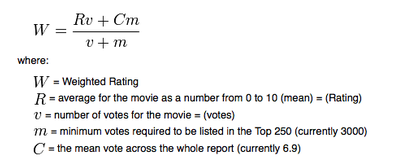

Now we use the weighted average formula to accumulate the highest rated products

In [288]:
v=cat1['rating_count']
R=cat1['avg_rating']
C=cat1['avg_rating'].mean()
m=cat1['rating_count'].quantile(0.85)

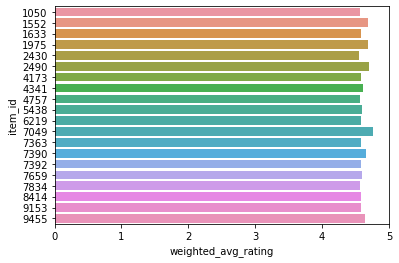

In [294]:
if inp.lower()=='new':
    cat1['weighted_avg_rating']=((R*v)+ (C*m))/(v+m)
    cat1.sort_values('weighted_avg_rating',ascending=False,inplace=True)
    cat1.reset_index(level=0, inplace=True)
    sns.barplot(y='item_id', x='weighted_avg_rating',data=cat1.head(20),orient='horizontal' )

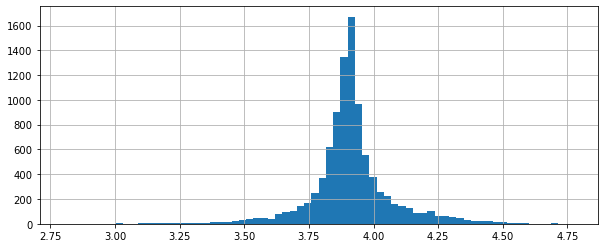

In [25]:
plt.figure(figsize=(10,4))
cat1['weighted_avg_rating'].hist(bins=70)

# Part II

Model-based collaborative filtering system

-Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.

-A model based collaborative filtering technique is closen here as it helps in making predictinfg products for a particular user by identifying patterns based on preferences from multiple user data.

In [32]:
df1=df.head(100000)

In [52]:
# x=df[df['rating']>3]
# x[x['rating']<4.5]

In [51]:
# df[df['year']>2015]

-Since the Dataset is too large, a sample of the dataset with 100000 observations has been taken. 

-The dataset can also be minimized based on rating (ex. rating between 3 and 4.5)

-or Trend shift of products over the years (ex. between year 2015 and 2018)

-or Based on the category selected


In [33]:
cat2_mat=df1.pivot_table(columns='user_id',index='item_id',values='rating',fill_value=0)

In [55]:
cat2_mat

user_id,0,1,2,3,4,5,6,7,8,9,...,95041,95042,95043,95044,95045,95046,95047,95048,95049,95050
item_id,,,,,,,,,,,,,,,,,,,,,
0,5,5,3,1,2,2,5,2,4,5,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
#Decomposing the Matrix

In [58]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(cat2_mat)
decomposed_matrix.shape

(2421, 10)

Checking the correlation of products and user ratings

In [59]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(2421, 2421)

### Product Id 
product Id of the item user needs recommendation for.

In [299]:
inp= input('Are you a new customer or an existing customer? \n ')

Are you a new customer or an existing customer? 
 existing


## People also Bought/Viewed
Using Pearsonn Correlation

In [301]:
if inp.lower()=='existing':  
    product_ID=int(input('Product ID: \n'))
    corr=correlation_matrix[product_ID]
    corr.shape
    corr99= pd.DataFrame(cat2_mat.index)
    corr99['correlation']=corr
    corr99=corr99.join(popular_products['rating'],on='item_id')
    corr99.sort_values('correlation',ascending=False,inplace=True)
    Recommendation=corr99[corr99['rating']>100].sort_values('correlation',ascending=False)
    Recommendation=list(Recommendation.index)
    print('Recommended Products are: \n',Recommendation[:10])

Product ID: 
2132
Recommended Products are: 
 [2132, 2242, 1420, 1657, 590, 1165, 2026, 1764, 1259, 1451]


In [191]:
# Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

# CATEGORY 3

In [156]:
df

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0
...,...,...,...,...,...,...,...,...,...,...
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0


In [303]:
# df['category'].unique()
# a=df['user_id'].value_counts()
# a[:100]

In [304]:
## CF using KNN

In [181]:
from scipy.sparse import csr_matrix

cat2_matrix = csr_matrix(cat2_mat.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(cat2_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [182]:
query_index = np.random.choice(cat2_mat.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(cat2_mat.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

2132


## Similar Items

In [184]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(cat2_mat.index[query_index]))
    else:
        print('{0}: {1}'.format(i, cat2_mat.index[indices.flatten()[i]]))

Recommendations for 2132:

1: 1611
2: 1613
3: 1615
4: 1612
5: 1610
